In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Punto a.
El sistema de ecuaciones es:
$$\frac{dN_a}{dt}=-\lambda_a N_a$$
$$\frac{dN_b}{dt}=\lambda_a N_a-\lambda_b N_b$$
$$\frac{dN_c}{dt}=\lambda_b N_b$$

In [43]:
def System(r,t):
    na,nb,nc=r
    dna=-0.5*na
    dnb=0.5*na - 0.3*nb
    dnc=0.3*nb

    return np.array([dna,dnb,dnc])

r=np.array([500,0,0])
t=np.linspace(0,10,50)

integracion = odeint(System,r,t)


In [44]:
def rungekutta(h:float,y:np.array,t:float,derivada)->np.array:
    k1=derivada(y,t)
    k2=derivada(y+(k1*h/2),t+(h/2))
    k3=derivada(y+(k2*h/2),t+(h/2))
    k4=derivada(y+(k3*h),t+h)
    return y+((k1+(2*k2)+(2*k3)+k4)*h/6)

In [45]:
def Adaptativo(f,r0,t,e=1e-4):
    t0=t[0]
    tf=t[-1]
    h=t[1]-t0
    r=r0
    t=t0
    TimeVector=[]
    Vectors=[]
    while t < tf:
        # Avance h desde el punto actual
        r1 = rungekutta(h,r,t,System)
        # Avance h desde el siguiente punto
        r2 = rungekutta(h,r1,t+h,System)
        # Avance 2h desde el punto actual
        rt = rungekutta(2*h,r,t,System)
        # El error es comparar los avances
        #->h->h y ->2h en sus componentes
        error = np.linalg.norm( r2 - rt )
        # Si el error es menor que la tolerancia (e) -> avanzo 2h
        if error < e:
            t += 2*h
            r = rt
            TimeVector.append(t)
            Vectors.append(r)
        # Llene vectores
        # Si el error es muy grande, cambie el paso
        # Según Fehlberg
        q = 0.85*(e/error)**(1/4)
        h = h*q
    TimeVector=np.array(TimeVector)
    Vectors=np.array(Vectors)
    return TimeVector, Vectors 




In [46]:
sol=Adaptativo(System,r,t,e=1e-4)
print("El número de pasos es: ",sol[0].size)

El número de pasos es:  37


Text(0.5, 1.0, 'Nuestro algoritmo')

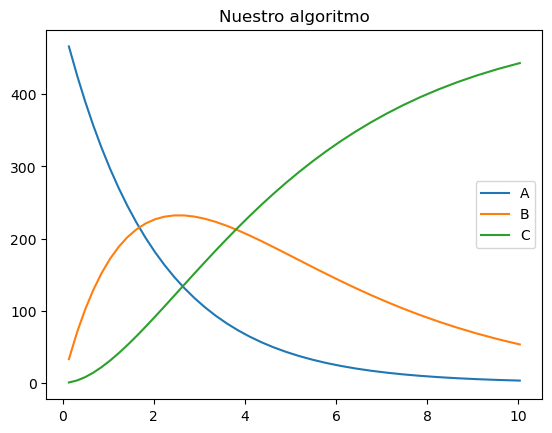

In [48]:
plt.plot(sol[0],sol[1][:,0],label="A")
plt.plot(sol[0],sol[1][:,1],label="B")
plt.plot(sol[0],sol[1][:,2],label="C")
plt.legend()
plt.title("Nuestro algoritmo")

Text(0.5, 1.0, 'Paquete odeint')

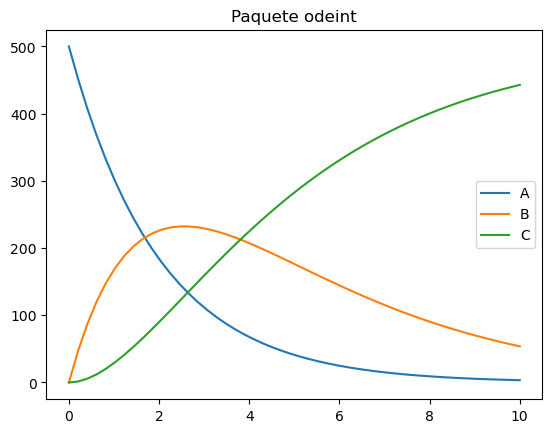

In [49]:
plt.plot(t,integracion[:,0],label="A")
plt.plot(t,integracion[:,1],label="B")
plt.plot(t,integracion[:,2],label="C")
plt.legend()
plt.title("Paquete odeint")

In [50]:
maximos=[]
decreciente=False
datos=sol[1][:,1]
for i in range(0,datos.size-1):
    if datos[i]>datos[i+1]:
        if not decreciente:
            maximos.append(i)
        decreciente=True
    else:
        decreciente=False
maximos
tiempo=sol[0][maximos[0]]
print("La cantidad de partículas B es máxima en la hora: ",tiempo)
print("Hay ",sol[1][maximos[0],1]," partículas A")
print("Hay ",sol[1][maximos[0],1]," partículas B")
print("Hay ",sol[1][maximos[0],2]," partículas C")

La cantidad de partículas B es máxima en la hora:  2.4520362395696504
Hay  232.1920182235683  partículas A
Hay  232.1920182235683  partículas B
Hay  121.0784558565119  partículas C


Se tiene un máximo y, en general un punto crítico cuando la derivada es cero. Se puede igualar la derivada cero para hallar las condiciones en las que se tiene un máximo:
$$\frac{dN_b}{dt}=\lambda_a N_a-\lambda_b N_b=0$$
$$\lambda_a N_a=\lambda_b N_b$$
La condición para el máximo sería que el producto del número de partículas y la tasa de decaimiento de las partículas A y B son iguales.